In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline

pd.options.display.max_columns = 100

# Eviction Data by Country, USA

To calculate eviction and filing rates, we divided the number of evictions and filings by the
number of renter-occupied households in that area.


In [3]:
df = pd.read_csv("data/counties_US.csv")
df.dropna(axis=0, how='any', inplace=True)
#print(df.iloc[0])
columns = df.columns
renames = {}
for col in columns:
    renames[col] = col.replace('-', '_')
df = df.rename(columns=renames)
df.describe()

,GEOID,year,population,poverty_rate,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,renter_occupied_households,eviction_filings,evictions,eviction_rate,eviction_filing_rate,imputed,subbed
count,41299.000000,41299.000000,4.129900e+04,41299.000000,41299.000000,41299.000000,41299.000000,4.129900e+04,41299.000000,41299.000000,41299.000000,41299.000000,41299.000000,41299.000000,41299.000000,41299.000000,41299.000000,4.129900e+04,41299.000000,41299.000000,41299.000000,41299.000000,41299.000000,41299.000000
mean,30928.597956,2008.187753,9.717697e+04,12.410998,26.820699,592.652970,42136.557350,1.164624e+05,26.821584,79.966203,8.409063,7.861583,1.186445,0.994529,0.063298,1.431872,0.087025,1.301934e+04,892.026490,374.336449,1.678239,3.201757,0.014819,0.015860
std,14754.405831,4.819986,3.287348e+05,5.813251,7.648861,189.157504,11524.034138,7.300267e+04,4.754268,18.957256,14.113073,13.083396,4.495723,2.096220,0.611061,1.426454,0.150616,5.425438e+04,4419.432913,1543.484514,1.977446,5.027240,0.120828,0.124935
min,1001.000000,2000.000000,6.700000e+01,0.000000,7.350000,178.000000,9333.000000,0.000000e+00,8.300000,2.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19089.000000,2004.000000,1.044500e+04,8.300000,21.740000,464.000000,34202.000000,7.470000e+04,23.600000,69.460000,0.420000,1.310000,0.140000,0.190000,0.000000,0.710000,0.000000,9.710000e+02,5.000000,3.000000,0.320000,0.490000,0.000000,0.000000
50%,29181.000000,2008.000000,2.351300e+04,11.460000,25.540000,571.000000,40657.000000,9.640000e+04,26.800000,87.330000,1.810000,2.810000,0.270000,0.430000,0.010000,1.130000,0.040000,2.315000e+03,37.000000,25.000000,1.110000,1.630000,0.000000,0.000000
75%,45086.000000,2012.000000,6.268300e+04,15.315000,30.430000,680.000000,48007.000000,1.363000e+05,29.800000,94.790000,9.250000,7.620000,0.580000,0.920000,0.040000,1.710000,0.110000,6.844500e+03,240.000000,140.000000,2.320000,3.800000,0.000000,0.000000
max,56045.000000,2016.000000,1.003839e+07,45.380000,100.000000,1827.000000,123453.000000,1.000001e+06,50.100000,100.000000,86.760000,95.680000,84.960000,45.260000,48.300000,23.490000,4.900000,1.792186e+06,143753.000000,47716.000000,24.160000,118.620000,1.000000,1.000000


In [4]:
df_year = df.groupby(['name','parent_location'],as_index=False).mean()
df_year.head()

,name,parent_location,GEOID,year,population,poverty_rate,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,renter_occupied_households,eviction_filings,evictions,eviction_rate,eviction_filing_rate,imputed,subbed
0,Abbeville County,South Carolina,45001.0,2013.000000,25057.000000,16.762857,21.271429,566.428571,34837.285714,88585.714286,38.471429,68.945714,27.981429,1.171429,0.144286,0.042857,0.002857,1.698571,0.012857,2429.000000,319.285714,60.428571,2.454286,13.152857,0.000000,0.0
1,Acadia Parish,Louisiana,22001.0,2007.230769,60137.384615,19.457692,29.153077,453.000000,32906.076923,78823.076923,26.423077,78.938462,18.106923,1.351538,0.164615,0.222308,0.047692,1.016923,0.150769,6571.923077,185.461538,65.384615,0.980000,2.835385,0.307692,0.0
2,Accomack County,Virginia,51001.0,2008.000000,36234.647059,13.515882,26.296471,635.823529,37071.588235,129300.000000,25.294118,61.233529,29.431765,7.777647,0.267059,0.230588,0.014706,0.951765,0.082941,3904.764706,128.529412,93.823529,2.403529,3.270000,0.000000,0.0
3,Ada County,Idaho,16001.0,2008.000000,367402.705882,7.542353,30.837647,756.294118,53163.235294,175800.000000,28.105882,87.654706,0.936471,6.360588,0.510588,2.218824,0.171765,2.017059,0.132941,44381.470588,954.294118,542.705882,1.283529,2.188235,0.000000,0.0
4,Adair County,Iowa,19001.0,2008.000000,7719.294118,6.640000,24.410000,484.058824,42374.000000,81900.000000,22.411765,97.903529,0.155882,1.017647,0.066471,0.247647,0.000588,0.588824,0.019412,802.764706,6.117647,5.235294,0.654706,0.765882,0.000000,0.0


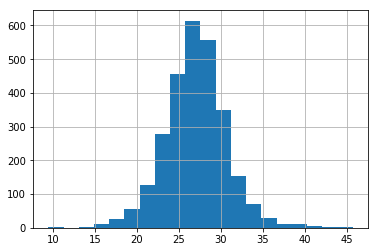

In [106]:
df_year.rent_burden.hist(bins = 20)

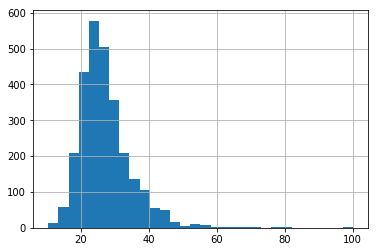

In [5]:
df_year.pct_renter_occupied.hist(bins = 30)

In [137]:
df_year[['rent_burden', 'pct_renter_occupied']].describe()

,rent_burden,pct_renter_occupied
count,2762.000000,2762.000000
mean,27.000278,27.150550
std,3.645831,7.607976
min,9.470588,10.408824
25%,24.747794,22.184118
50%,27.032353,25.812463
75%,29.159286,30.567647
max,45.675000,100.000000


In [6]:
df_year.loc[df_year['name'] == 'San Mateo County', ['rent_burden','pct_renter_occupied']]

,rent_burden,pct_renter_occupied
2217,29.093333,39.562


# Null hypothesis: No difference exist between the rent burden of Santa Clara County with nationwide rent burden average by counties (average over the year 2000 - 2016)

In [133]:
df_year.loc[df_year.name == 'Santa Clara County', ['rent_burden', 'pct_renter_occupied']]

,rent_burden,pct_renter_occupied
2229,27.8,41.992


In [145]:
t = (27.8 - 27.000278) /( 3.645831 / np.sqrt(2762))
# 95% one tail t test 1.645
print("t value:{:.2f}, outlier? (95% one-tail) {}".format(t, t>1.645))

t value:11.53, outlier? (95% one-tail) True


# Null hypothesis: No difference exist between the percentage of renters households of Santa Clara County with nationwide rent burden average by counties (average over the year 2000 - 2016)

In [146]:
t = (41.992 - 27.150550) / (7.607976 / np.sqrt(2762))
# 95% one tail t test 1.645
print("t value:{:.2f}, outlier? (95% one-tail) {}".format(t, t>1.645))

t value:102.52, outlier? (95% one-tail) True


# Year 2016
The official poverty rate is 12.7 percent, based on the U.S. Census Bureau’s 2016 estimates.


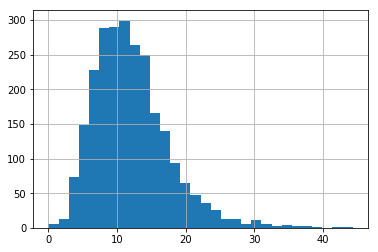

In [10]:
df[df.year == 2016].poverty_rate.hist(bins = 30)

In [14]:
df[df.year == 2016].poverty_rate.describe()

count    2493.000000
mean       12.074886
std         5.484676
min         0.000000
25%         8.140000
50%        11.210000
75%        14.860000
max        44.320000
Name: poverty_rate, dtype: float64

As of 2013, there are currently 3,142 counties and county-equivalents in the 50 states and District of Columbia. If the 100 county equivalents in the U.S. territories are counted, then the total is 3,242 counties and county-equivalents in the United States.

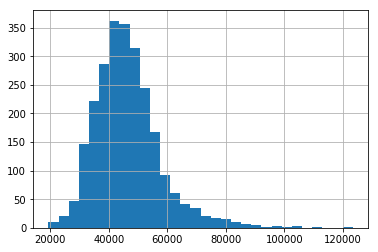

In [15]:
df[df.year == 2016].median_household_income.hist(bins = 30)

In [16]:
df[df.year == 2016].median_household_income.describe()

count      2493.000000
mean      46425.501404
std       11569.151671
min       19328.000000
25%       38917.000000
50%       44942.000000
75%       51830.000000
max      123453.000000
Name: median_household_income, dtype: float64

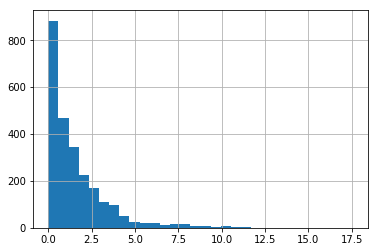

In [13]:
df[df.year == 2016].eviction_rate.hist(bins = 30)

# Null hypothesis: eviction rates are the same for the bottom and top 25% poverty rates ( by counties in year 2016 )

In [17]:
# Pick 2016 data set by poverty rate, bottom and top 25%
df_poverty_low = df[(df.year == 2016) & (df.poverty_rate < 8.14)]
df_poverty_high = df[(df.year == 2016) & (df.poverty_rate > 14.86)]

In [18]:
df_poverty_low.eviction_rate.describe()

count    623.000000
mean       1.117303
std        1.276771
min        0.000000
25%        0.200000
50%        0.720000
75%        1.585000
max        7.930000
Name: eviction_rate, dtype: float64

In [19]:
df_poverty_high.eviction_rate.describe()

count    623.000000
mean       1.861653
std        2.531384
min        0.000000
25%        0.140000
50%        1.100000
75%        2.435000
max       17.560000
Name: eviction_rate, dtype: float64

In [23]:
# since the number of total counties of USA is 3142, and the data set contains 2493 counties, \
# so I consider the data set as a sample
#two sample t test with pooled variance since 2.531384/1.276771 = 1.98 < 2
n1 = df_poverty_low.eviction_rate.count()
n2 = df_poverty_high.eviction_rate.count()
sp = np.sqrt(( (n1-1)*df_poverty_low.eviction_rate.std()**2 + (n2-1)*df_poverty_high.eviction_rate.std()**2 )/(n1+n2-2) )

t = (df_poverty_low.eviction_rate.mean() - df_poverty_high.eviction_rate.mean()) / (sp* np.sqrt(1/n1 + 1/n2))
# 95% two tail t score is about 1.962

# Cohen's d
d = (df_poverty_low.eviction_rate.mean() - df_poverty_high.eviction_rate.mean()) / sp

print("Statistically significant at two tail 95%? {} \n Cohen's d {:.2f}".format(abs(t)>1.96, d) )

Statistically significant at two tail 95%? True 
 Cohen's d -0.37


# Null hypothesis: African American race rates are the same for the bottom and top 25% eviction rates ( by counties in year 2016 )

In [7]:
df[df.year == 2016].eviction_rate.describe()

count    2493.000000
mean        1.592631
std         1.926662
min         0.000000
25%         0.270000
50%         1.050000
75%         2.200000
max        17.560000
Name: eviction_rate, dtype: float64

In [12]:
df_evict_low = df[(df.year == 2016) & (df.eviction_rate < 0.27)]
df_evict_high = df[(df.year == 2016) & (df.eviction_rate > 2.2)]

In [13]:
df_evict_low.pct_af_am.describe()

count    611.000000
mean       7.298347
std       14.474661
min        0.000000
25%        0.270000
50%        0.860000
75%        5.165000
max       85.950000
Name: pct_af_am, dtype: float64

In [14]:
df_evict_high.pct_af_am.describe()

count    616.000000
mean      16.005714
std       16.965698
min        0.000000
25%        2.475000
50%        9.570000
75%       25.472500
max       76.740000
Name: pct_af_am, dtype: float64

In [22]:
#pooled variance since ratio = 14.474661/16.965698 >0.5
n1 = df_evict_low.eviction_rate.count()
n2 = df_evict_high.eviction_rate.count()
sp = np.sqrt(( (n1-1)*df_evict_low.pct_af_am.std()**2 + (n2-1)*df_evict_high.pct_af_am.std()**2 )/(n1+n2-2) )

t = (df_evict_low.pct_af_am.mean() - df_evict_high.pct_af_am.mean()) / (sp* np.sqrt(1/n1 + 1/n2))
# 95% two tail t score is about 1.962

# Cohen's d
d = (df_evict_low.pct_af_am.mean() - df_evict_high.pct_af_am.mean()) / sp

print("Statistically significant at two tail 95%? {} \n Cohen's d: {:.2f}".format(abs(t)>1.96, d) )

Statistically significant at two tail 95%? True 
 Cohen's d: -0.55


In [25]:
df_evict_low.pct_white.describe()

count    611.000000
mean      77.227676
std       21.920435
min        3.150000
25%       64.115000
50%       86.480000
75%       94.485000
max       99.760000
Name: pct_white, dtype: float64

# How about white race?

In [26]:
df_evict_high.pct_white.describe()

count    616.000000
mean      72.468328
std       19.040230
min       10.290000
25%       59.995000
50%       75.520000
75%       89.065000
max       98.030000
Name: pct_white, dtype: float64

In [27]:
#pooled variance since ratio = 14.474661/16.965698 >0.5
n1 = df_evict_low.eviction_rate.count()
n2 = df_evict_high.eviction_rate.count()
sp = np.sqrt(( (n1-1)*df_evict_low.pct_white.std()**2 + (n2-1)*df_evict_high.pct_white.std()**2 )/(n1+n2-2) )

t = (df_evict_low.pct_white.mean() - df_evict_high.pct_white.mean()) / (sp* np.sqrt(1/n1 + 1/n2))
# 95% two tail t score is about 1.962

# Cohen's d
d = (df_evict_low.pct_white.mean() - df_evict_high.pct_white.mean()) / sp

print("Statistically significant at two tail 95%? {} \n Cohen's d: {:.2f}".format(abs(t)>1.96, d) )

Statistically significant at two tail 95%? True 
 Cohen's d: 0.23


# how about controlled comparisons? Grouped by similar income, education level, and rent burden, would different levels of eviction rates have similar races?

# Is there a correlation between high eviction rates with high crime rates in the following years?

In [ ]:
#tbc...